In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df= pd.read_csv('titanic_train.csv',usecols = ['Age','Fare','Survived'])
df.sample(6)

,Survived,Age,Fare
423,0,28.0,14.400
745,0,70.0,71.000
458,1,50.0,10.500
528,0,39.0,7.925
241,1,NaN,15.500
694,0,60.0,26.550


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.sample(6)

,Survived,Age,Fare
343,0,25.000000,13.0000
688,0,18.000000,7.7958
572,1,36.000000,26.3875
367,1,29.699118,7.2292
148,0,36.500000,26.0000
664,1,20.000000,7.9250


In [8]:
X = df.iloc[:,1:3]# Age, Fare
y = df.iloc[:,0]#Survived

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


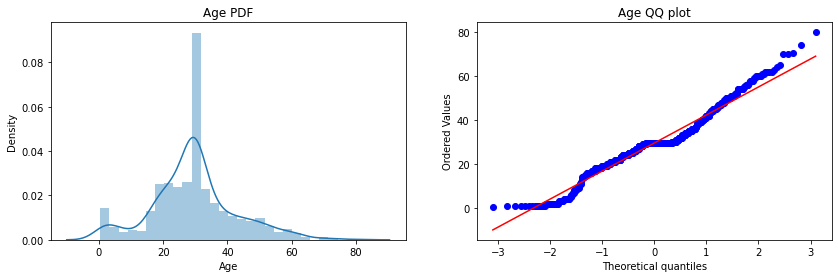

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm", plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\nagam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


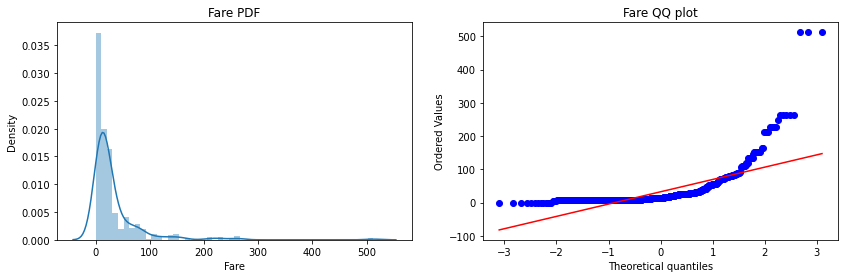

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm", plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [12]:
clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("accuracy DT",accuracy_score(y_test,y_pred))
print("accuracy LR",accuracy_score(y_test,y_pred1))

accuracy DT 0.6480446927374302
accuracy LR 0.6480446927374302


In [14]:
trf = FunctionTransformer(func=np.log1p)

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf1.predict(X_test)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))

accuracy LR 0.7374301675977654
accuracy DT 0.5921787709497207


In [17]:
x_transformed = trf.fit_transform(X)

clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6633208489388265


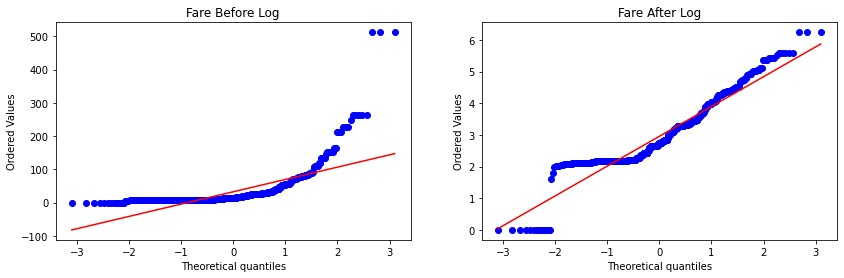

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist = "norm",plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

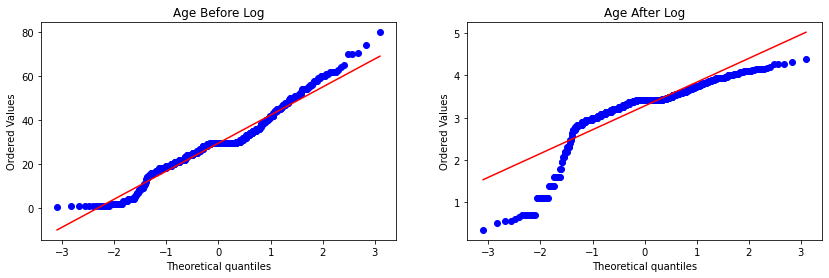

In [19]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist = "norm",plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [20]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [21]:
clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf1.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred1 = clf1.predict(X_test_transformed2)

print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))

accuracy LR 0.6703910614525139
accuracy DT 0.664804469273743


In [22]:
x_transformed2 = trf.fit_transform(X)

clf =LogisticRegression()
clf1 =DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed2,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6610986267166041


In [23]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


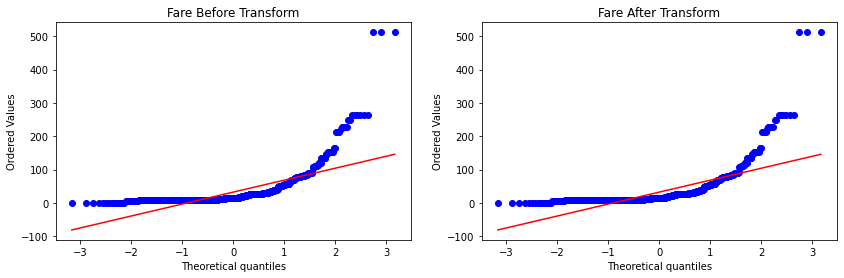

In [24]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


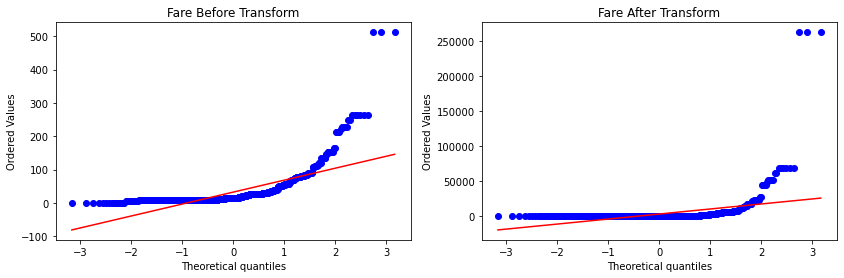

In [25]:
apply_transform(lambda x:x**2)# if its left skewed data it wil perform well

Accuracy 0.39843945068664166


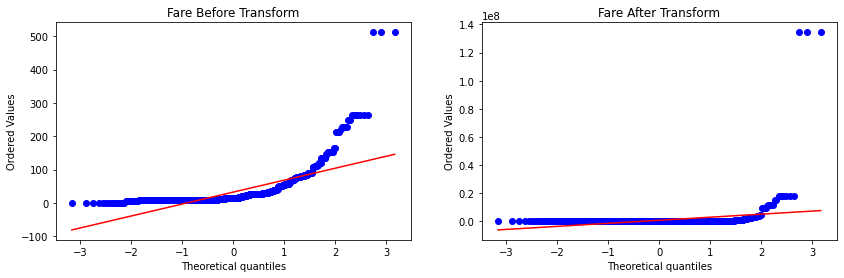

In [26]:
apply_transform(lambda x:x**3)

Accuracy 0.6589013732833957


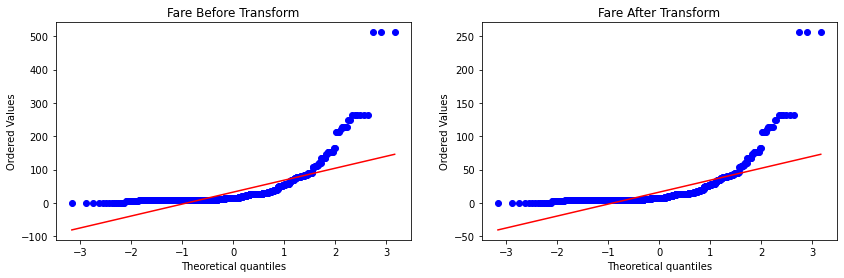

In [27]:
apply_transform(lambda x:x**1/2)#squre root

Accuracy 0.61729088639201


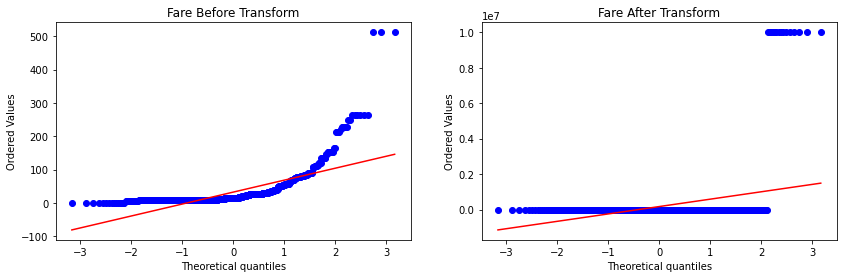

In [28]:
apply_transform(lambda x:1/(x+0.0000001))#reciprocal

Accuracy 0.61729088639201


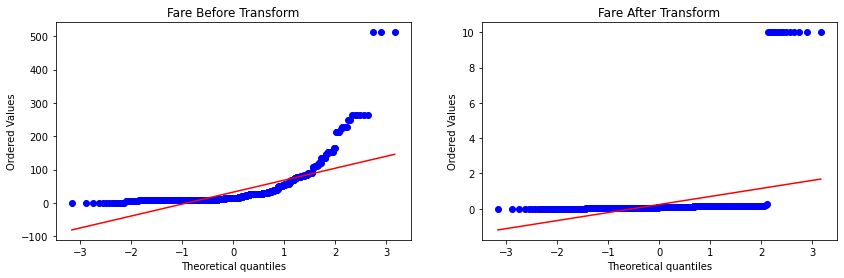

In [29]:
apply_transform(lambda x:1/(x+0.1))#reciprocal

Accuracy 0.6195131086142323


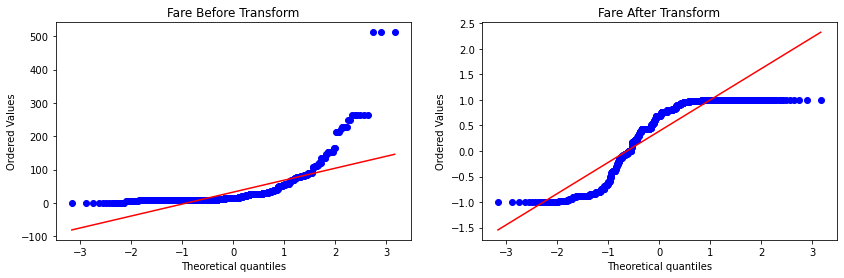

In [30]:
apply_transform(np.sin)